# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


In [26]:
df.dtypes

,0
age,float64
sex,float64
cp,float64
trestbps,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada.
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [6]:
def bivariada(df, y, x): # considerando-se que y é a variável-resposta e x a variável explicativa
  biv = (df.groupby(x)[y]
        .agg(doentes='sum', total='count')
    )

  biv['saudaveis'] = biv['total'] - biv['doentes']
  biv['media_doentes'] = biv['doentes'] / biv['total']
  biv['odds'] = biv['doentes'] / biv['saudaveis']

  # Odds total
  total_doentes = df[y].sum()
  total_saudaveis = len(df) - total_doentes
  odds_total = total_doentes / total_saudaveis

  biv['odds_ratio'] = biv['odds'] / odds_total
  biv['logito'] = np.log(biv['odds'])
  biv['woe'] = np.log(biv['odds_ratio'])

  return biv

In [12]:
biv_sex = bivariada(df, 'flag_doente', 'sex')
biv_sex

,doentes,total,saudaveis,media_doentes,odds,odds_ratio,logito,woe
sex,,,,,,,,
0.0,25,97,72,0.257732,0.347222,0.409672,-1.05779,-0.892398
1.0,114,206,92,0.553398,1.239130,1.461996,0.21441,0.379802


In [13]:
biv_cp = bivariada(df, 'flag_doente', 'cp')
biv_cp

,doentes,total,saudaveis,media_doentes,odds,odds_ratio,logito,woe
cp,,,,,,,,
1.0,7,23,16,0.304348,0.437500,0.516187,-0.826679,-0.661286
2.0,9,50,41,0.180000,0.219512,0.258993,-1.516347,-1.350955
3.0,18,86,68,0.209302,0.264706,0.312315,-1.329136,-1.163743
4.0,105,144,39,0.729167,2.692308,3.176536,0.990399,1.155791


In [14]:
biv_exang = bivariada(df, 'flag_doente', 'exang')
biv_exang

,doentes,total,saudaveis,media_doentes,odds,odds_ratio,logito,woe
exang,,,,,,,,
0.0,63,204,141,0.308824,0.446809,0.527170,-0.805625,-0.640233
1.0,76,99,23,0.767677,3.304348,3.898655,1.195239,1.360632


Para determinar qual variável discrimina melhor o risco, usaremos o seguinte critério:
- Amplitude máxima do WOE: mede o contraste extremo entre um grupo e o total:
max(|WOE|)

Calculando a amplitude de cada variável, obtemos:
- `sex` ≈ 0.892
- `cp` ≈ 1.350
- `exang` ≈ 1.360

A variável de maior amplitude é `exang`. Portanto, `exang` é a variável que mais faz discriminação extrema do risco segundo esse critério.

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [36]:
def bivariada_quantitativa (df, y, x, n_grupos=5):
  df_aux = df.copy()
  df_aux[f'{x}_cat'] = pd.qcut(df_aux[x], q=n_grupos, duplicates='drop')

  biv = (df_aux.groupby(f'{x}_cat')[y]
        .agg(doentes='sum', total='count')
  )

  biv['saudaveis'] = biv['total'] - biv['doentes']
  biv['media_doentes'] = biv['doentes'] / biv['total']
  biv['odds'] = biv['doentes'] / biv['saudaveis']

  # Odds total
  total_doentes = df_aux[y].sum()
  total_saudaveis = len(df_aux) - total_doentes
  odds_total = total_doentes / total_saudaveis

  biv['odds_ratio'] = biv['odds'] / odds_total
  biv['logito'] = np.log(biv['odds'])
  biv['woe'] = np.log(biv['odds_ratio'])

  return biv

In [37]:
biv_age = bivariada_quantitativa(df, 'flag_doente', 'age', n_grupos=10)
biv_age

/tmp/ipython-input-2393129832.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  biv = (df_aux.groupby(f'{x}_cat')[y]


,doentes,total,saudaveis,media_doentes,odds,odds_ratio,logito,woe
age_cat,,,,,,,,
"(28.999, 42.0]",8,36,28,0.222222,0.285714,0.337102,-1.252763,-1.087370
"(42.0, 45.0]",8,27,19,0.296296,0.421053,0.496782,-0.864997,-0.699605
"(45.0, 50.0]",13,31,18,0.419355,0.722222,0.852118,-0.325422,-0.160030
"(50.0, 53.0]",9,33,24,0.272727,0.375000,0.442446,-0.980829,-0.815437
"(53.0, 56.0]",17,35,18,0.485714,0.944444,1.114309,-0.057158,0.108234
"(56.0, 58.0]",22,36,14,0.611111,1.571429,1.854060,0.451985,0.617378
"(58.0, 59.4]",9,14,5,0.642857,1.800000,2.123741,0.587787,0.753179
"(59.4, 62.0]",23,31,8,0.741935,2.875000,3.392086,1.056053,1.221445
"(62.0, 66.0]",17,34,17,0.500000,1.000000,1.179856,0.000000,0.165392


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [41]:
reglog = smf.logit("flag_doente ~ sex + C(cp) + trestbps + age", data=df).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Mon, 22 Dec 2025   Pseudo R-squ.:                  0.3097
Time:                        16:19:50   Log-Likelihood:                -144.27
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.692e-25
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -8.3407      1.621     -5.145      0.000     -11.518      -5.163
C(cp)[T.2.0]    -0.0617      0.636     -0.097      0.923      -1.309       1.186
C(cp)[T.3.0]     0.0715      0.573      0.125      0.901      -1.051       1.194
C(cp)[T.4.0]     2.4789      0.553      4.485      0.000       1.396       3.562
sex              1.8094      0.353      5.130      0.000       1.118       2.501
trestbps         0.0193      0.009      2.261      0.024       0.003       0.036
age              0.0567      0.018      3.120      0.002       0.021       0.092
================================================================================
"""

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [42]:
df['predito'] = reglog.predict(df)

In [43]:
df['cat_pred'] = pd.qcut(df['predito'], 5, duplicates='drop')
df['cat_pred'].value_counts().sort_index()

,count
cat_pred,
"(0.0131, 0.143]",62
"(0.143, 0.287]",59
"(0.287, 0.586]",62
"(0.586, 0.822]",59
"(0.822, 0.944]",61


In [45]:
group_reg = df.groupby('cat_pred')

calib = group_reg['flag_doente'].count().to_frame('contagem')
calib['media_predita'] = group_reg['predito'].mean()
calib['taxa_observada'] = group_reg['flag_doente'].mean()
calib

/tmp/ipython-input-977621784.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_reg = df.groupby('cat_pred')


,contagem,media_predita,taxa_observada
cat_pred,,,
"(0.0131, 0.143]",62,0.072008,0.080645
"(0.143, 0.287]",59,0.209626,0.152542
"(0.287, 0.586]",62,0.435175,0.483871
"(0.586, 0.822]",59,0.708861,0.762712
"(0.822, 0.944]",61,0.874819,0.819672


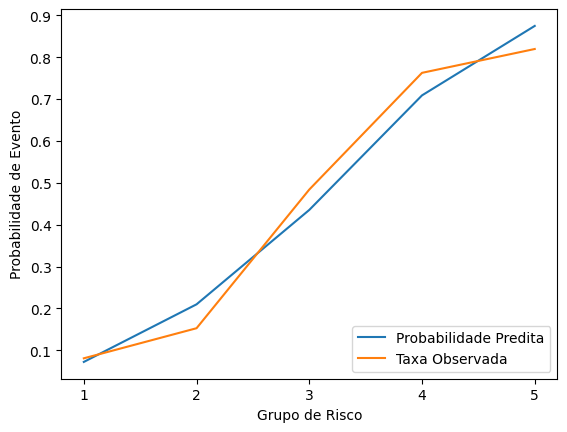

In [47]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = calib['media_predita'].plot(label='Probabilidade Predita')
ax = calib['taxa_observada'].plot(label='Taxa Observada')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc='lower right')
ax.set_xlabel('Grupo de Risco')
ax.set_ylabel('Probabilidade de Evento')

plt.show()

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [57]:
from sklearn import metrics
from scipy.stats import ks_2samp

acc = metrics.accuracy_score(df['flag_doente'], df['predito'] >= 0.5)
print("Acurácia: {0:.2f}%".format(acc*100))

# AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)

# Gini
gini = 2 * auc_ - 1

# KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGini: {2:.2f}%'.format(ks*100, auc_*100, gini*100))

Acurácia: 79.54%
KS: 59.30% 
AUC: 85.19% 
Gini: 70.39%


6. Tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [59]:
# C(cp)[T.2.0] e C(cp)[T.3.0] são bem insignificantes estatisticamente. Não
# contribuem para o modelo.

# Agrupando categorias com comportamento semelhante (baseado no WOE)
df['cp_bin'] = df['cp'].replace({1: 0, 2: 0, 3: 0, 4: 1})

reglog2 = smf.logit("flag_doente ~ sex + trestbps + age + cp_bin", data=df).fit()
reglog2.summary()

Optimization terminated successfully.
         Current function value: 0.476281
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Mon, 22 Dec 2025   Pseudo R-squ.:                  0.3095
Time:                        16:34:26   Log-Likelihood:                -144.31
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 5.347e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3255      1.461     -5.699      0.000     -11.189      -5.462
sex            1.8067      0.351      5.142      0.000       1.118       2.495
trestbps       0.0193      0.008      2.283      0.022       0.003       0.036
age            0.0568      0.018      3.136      0.002       0.021       0.092
cp_bin         2.4583      0.306      8.039      0.000       1.859       3.058
==============================================================================
"""

In [60]:
# Modelando age de forma não linear
df['age2'] = df['age'] ** 2

reglog3 = smf.logit("flag_doente ~ sex + trestbps + cp_bin + age2", data=df).fit()
reglog3.summary()

Optimization terminated successfully.
         Current function value: 0.477328
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Mon, 22 Dec 2025   Pseudo R-squ.:                  0.3080
Time:                        16:35:04   Log-Likelihood:                -144.63
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 7.308e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.8237      1.261     -5.410      0.000      -9.296      -4.352
sex            1.8065      0.351      5.142      0.000       1.118       2.495
trestbps       0.0196      0.008      2.322      0.020       0.003       0.036
cp_bin         2.4638      0.305      8.068      0.000       1.865       3.062
age2           0.0005      0.000      3.056      0.002       0.000       0.001
==============================================================================
"""

In [63]:
# Inserindo uma variável forte. Como já vimos antes, exang tem WOE bem alto
reglog4 = smf.logit("flag_doente ~ sex + trestbps + cp_bin + age2 + exang", data=df).fit()
reglog4.summary()

Optimization terminated successfully.
         Current function value: 0.457090
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            5
Date:                Mon, 22 Dec 2025   Pseudo R-squ.:                  0.3373
Time:                        16:37:06   Log-Likelihood:                -138.50
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.104e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.7351      1.291     -5.217      0.000      -9.266      -4.205
sex            1.7117      0.359      4.770      0.000       1.008       2.415
trestbps       0.0182      0.009      2.102      0.036       0.001       0.035
cp_bin         2.0527      0.323      6.348      0.000       1.419       2.687
age2           0.0005      0.000      3.000      0.003       0.000       0.001
exang          1.1818      0.340      3.474      0.001       0.515       1.849
==============================================================================
"""

In [67]:
df['predito2'] = reglog4.predict(df)

In [68]:
acc = metrics.accuracy_score(df['flag_doente'], df['predito2'] >= 0.5)
print("Acurácia: {0:.2f}%".format(acc*100))

# AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito2'])
auc_ = metrics.auc(fpr, tpr)

# Gini
gini = 2 * auc_ - 1

# KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito2'], df.loc[df['flag_doente'] != 1, 'predito2']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGini: {2:.2f}%'.format(ks*100, auc_*100, gini*100))

Acurácia: 78.55%
KS: 61.00% 
AUC: 86.50% 
Gini: 73.00%


Comparando:
1º modelo:
- Acurácia: 79.54%
- KS: 59.30%
- AUC: 85.19%
- Gini: 70.39%

2ª modelo:
- Acurácia: 78.55%
- KS: 61.00%
- AUC: 86.50%
- Gini: 73.00%

A acurácia deu ligeiramente menor, porém todas as outras métricas aumentaram. A acurácia depende do ponto de corte e é menos informativa no contexto de modelagem de risco. Além disso, o modelo final apresenta coeficientes estatisticamente mais significativas.